In [1]:
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


# 读取 MNIST 数据

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 建立 Autoencoders

In [5]:
from keras.layers import Input, Dense
from keras.models import Model

In [12]:
# 定义压缩后神经元的数量
encoding_dim = 32
input_img = Input(shape=(784,))

# 把输入的神经元压缩成encoding_dim 个神经元， encoded 为一个 784 x 32 的矩阵
encoded = Dense(encoding_dim, activation='relu')(input_img)

# decoded 把32 个神经元还原成 784 个神经元
decoded = Dense(784, activation='sigmoid')(encoded)

# 调用 model 建立 Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 训练 Autoencoders

In [13]:
autoencoder.fit(x_train, x_train,
               epochs = 50, 
               batch_size=256,
               shuffle=True,     # shuffle 把数据进行洗牌
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2761 - val_loss: 0.1858
Epoch 2/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.1684 - val_loss: 0.1530
Epoch 3/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1449 - val_loss: 0.1332
Epoch 4/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1277 - val_loss: 0.1198
Epoch 5/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1169 - val_loss: 0.1114
Epoch 6/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.1099 - val_loss: 0.1056
Epoch 7/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1049 - val_loss: 0.1016
Epoch 8/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.1014 - val_loss: 0.0987
Epoch 9/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.0988 - val_loss: 0.0966
Epoch

# 建立 Encoder

In [20]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

In [21]:
encoded_imgs.shape

(10000, 32)

# 建立 Decoder

In [19]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [23]:
decoded_imgs = decoder.predict(encoded_imgs)

In [24]:
decoded_imgs.shape

(10000, 784)

# 检视原始与重建图像

Populating the interactive namespace from numpy and matplotlib


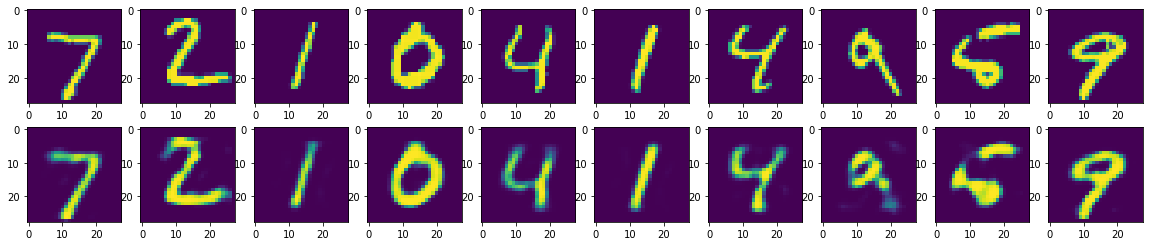

In [33]:
%pylab inline
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # 原始图片
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    
    # 重建图片
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    
plt.show()